In [1]:
#import user modules
#--- MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import sys
my_path = "../../Python/"
if my_path not in sys.path:
    sys.path.append(my_path)
 
for place in sys.path: 
    print(place)

from Quad_tools import *
from fit_funcs import *
from entropy import *
import costfun.costfun as cost
import utils.figures as fig_help
from RandomMatrixTheory import goe
import utils.tools as tools

import importlib as imp
def reload_modules():
    imp.reload(cost)
    imp.reload(fig_help)

import itertools
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
latex_engine = 'xelatex'
latex_elements = {'preamble':r'\usepackage{physics}'}

%matplotlib inline
colors_ls = (list(mcolors.TABLEAU_COLORS)[:200])
colors_ls_cyc = itertools.cycle(colors_ls)

markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

linestyle_ls = ['-','--',':', '-.']
linestyle = itertools.cycle(linestyle_ls)

#--- NUMERICAL LIBS
import numpy as np
import itertools
import math
import random
from cmath import nan
import h5py   


# SCIPY LIBS
import scipy.stats as statistics
from scipy.special import binom
from scipy.special import erfinv
from scipy.special import erf
from scipy.special import digamma
from scipy.special import polygamma
from scipy.special import lambertw
from scipy.optimize import curve_fit as fit
from scipy.signal import savgol_filter
from scipy import integrate
from scipy import fft
from scipy.interpolate import UnivariateSpline as InterpolateSpline
from scipy.interpolate import splrep, splev
from scipy.interpolate import make_interp_spline as make_spline
from scipy.interpolate import interp1d
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.axes_grid1 import make_axes_locatable

# OTHER
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import copy
import os
from os import sep as kPSep
from os.path import exists


DIM = 1
modello = 'FreeFermions'


def base_dir(model, d):
    """
    Base directory for input model for d-dimension
    """
    dirx = f"../results/{model}/dim={d}/PBC/"
    return dirx

print(base_dir(modello, DIM))
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

/Users/rafal.swietek/Projects/CODES/QHamSolver/Quadratic/Jupyter_Python
/Users/rafal.swietek/opt/anaconda3/lib/python39.zip
/Users/rafal.swietek/opt/anaconda3/lib/python3.9
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/lib-dynload

/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/aeosa
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions
/Users/rafal.swietek/.ipython
../../Python/
../results/FreeFermions/dim=1/PBC/


[2 3 4 4 4 5]
../results/FreeFermions/dim=1/PBC/Entropy/Degeneracy/E=0,Q=0/_L=8,J=1.hdf5
../results/FreeFermions/dim=1/PBC/Entropy/Degeneracy/E=0,Q=0/_L=12,J=1.hdf5
../results/FreeFermions/dim=1/PBC/Entropy/Degeneracy/E=0,Q=0/_L=16,J=1.hdf5
../results/FreeFermions/dim=1/PBC/Entropy/Degeneracy/E=0,Q=0/_L=20,J=1.hdf5
../results/FreeFermions/dim=1/PBC/Entropy/Degeneracy/E=0,Q=0/_L=24,J=1.hdf5
../results/FreeFermions/dim=1/PBC/Entropy/Degeneracy/E=0,Q=0/_L=28,J=1.hdf5
[0.25 0.5  0.75 2.  ]


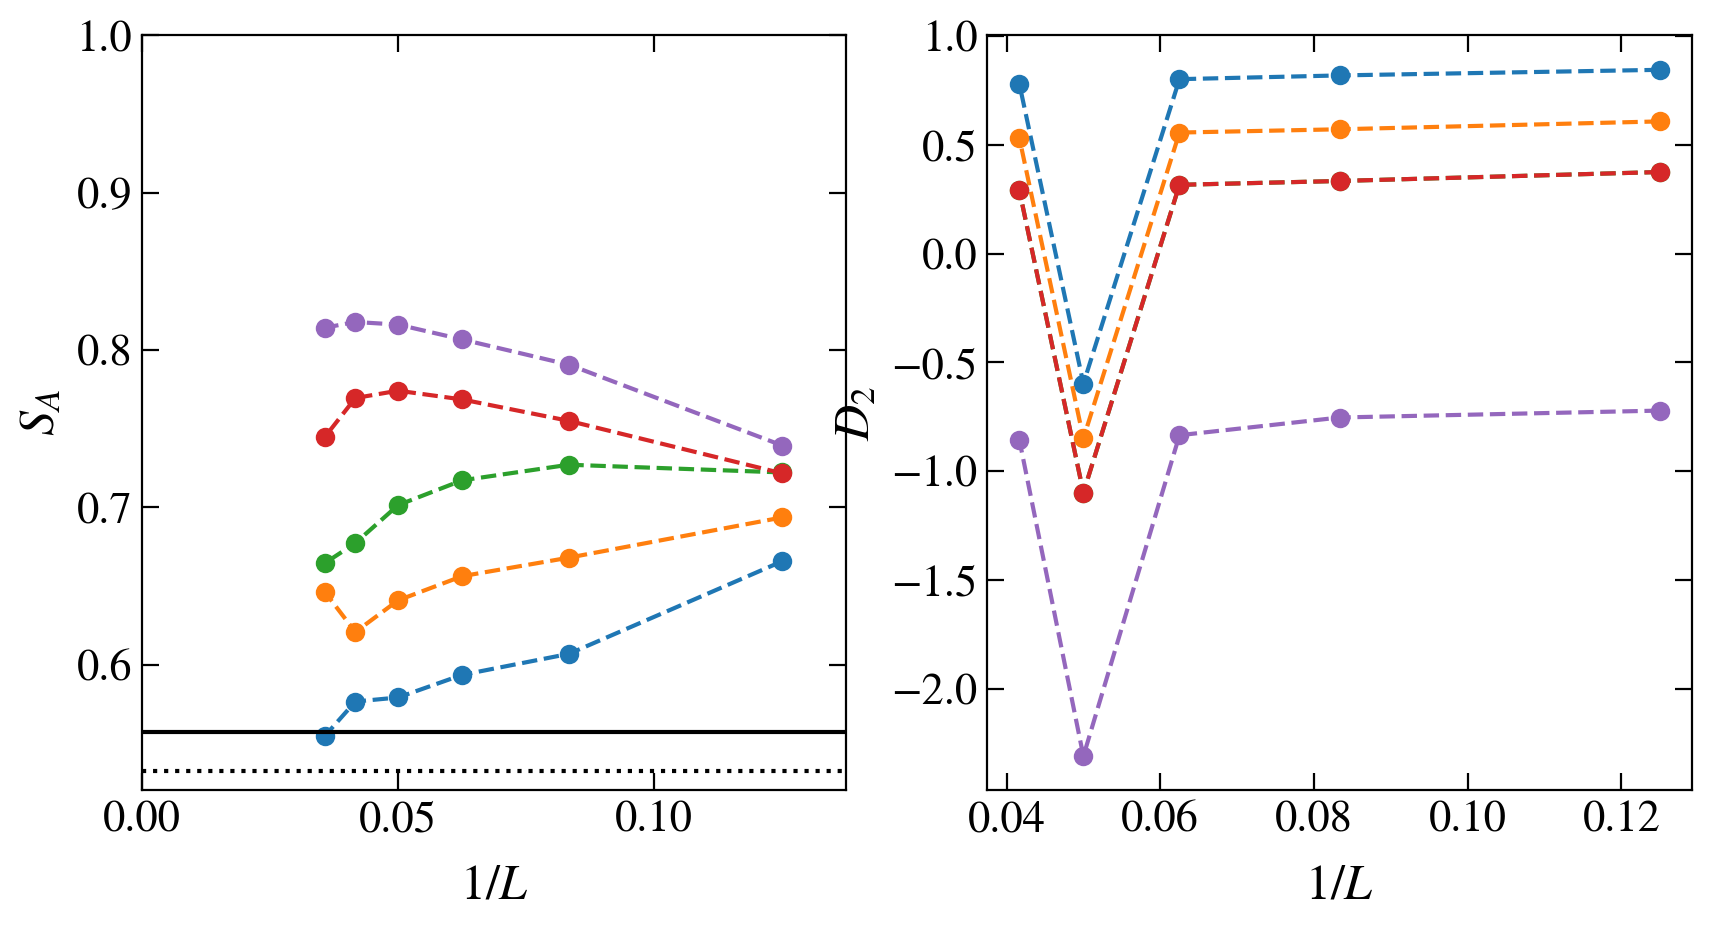

In [2]:
L = 20
w = 2
J = 1
op=0

DIM = 1
modello = 'FreeFermions'

prefix = base_dir(model=modello, d=DIM) + 'Entropy/Degeneracy/'
if op == 0:     prefix += "E=0,Q=0/"
elif op == 2:   prefix += "AllStates/"
else:           prefix += "RandomChoice/"

fig, axis = plt.subplots( nrows=1, ncols=2, figsize=(10,5), dpi = 200)

sizes = np.arange(8, 29, 4)

print( (sizes**0.5).astype(int) )

S = []
pr = []
qs = None
for L in sizes:
    name = prefix + info(L=L, J=J, w=w, model = modello, ext='.hdf5')
    print(name)
    if exists(name):
        with h5py.File(name, "r") as file:
            S.append(np.array(file.get('entropy')) / (L//2 * np.log(2)))
            
            pr.append( np.array(file.get('participation_ratio'))[-1])
            qs = np.array(file.get('qs'))
            # print(np.array(file.get('participation_ratio'))[-1].shape, qs.shape)
            
S = np.transpose(np.array(S))
pr = np.transpose(np.array(pr))
print(qs)

# def plot_and_fit(y, label):
#     axis[0].scatter(1/sizes, y, label=label)
    

axis[0].plot(1/sizes, S[0], label=r'$\Gamma=1$',    ls='--', marker='o')
axis[0].plot(1/sizes, S[1], label=r'$\Gamma=2$',    ls='--', marker='o')
axis[0].plot(1/sizes, S[2], label=r'$\Gamma=4$',    ls='--', marker='o')
axis[0].plot(1/sizes, S[-2], label=r'$\Gamma=L/2$', ls='--', marker='o')
axis[0].plot(1/sizes, S[-1], label=r'$\Gamma=L$',   ls='--', marker='o')

def fract_dim(pr, idx):
    return np.diff(pr[idx]) / np.log(2) / (qs[idx] - 1)

# print( np.diff(pr[0] ) / np.log(2))
axis[1].plot(1/sizes[:-1], np.diff( np.log2(pr[0] ) ) / np.diff((sizes))  , ls='--', marker='o')
axis[1].plot(1/sizes[:-1], np.diff( np.log2(pr[1] ) ) / np.diff((sizes))  , ls='--', marker='o')
axis[1].plot(1/sizes[:-1], np.diff( np.log2(pr[2] ) ) / np.diff((sizes))  , ls='--', marker='o')
axis[1].plot(1/sizes[:-1], np.diff( np.log2(pr[-2]) ) / np.diff((sizes))  , ls='--', marker='o')
axis[1].plot(1/sizes[:-1], np.diff( np.log2(pr[-1]) ) / np.diff((sizes))  , ls='--', marker='o')

axis[0].axhline(y=gaussian(0.5), ls='-', c='k')
axis[0].axhline(y=freefermions([0.5]), ls=':', c='k')

fig_help.set_plot_elements(axis[0], xlabel=r"$1/L$", ylabel=r"$S_A$", font_size=16, set_legend=False, xscale='linear', yscale='linear', xlim=(0, 1.1/8), ylim=(0.52, 1))
fig_help.set_plot_elements(axis[1], xlabel=r"$1/L$", ylabel=r"$D_2$", font_size=16, set_legend=False, xscale='linear', yscale='linear')